https://projecteuler.net/problem=67
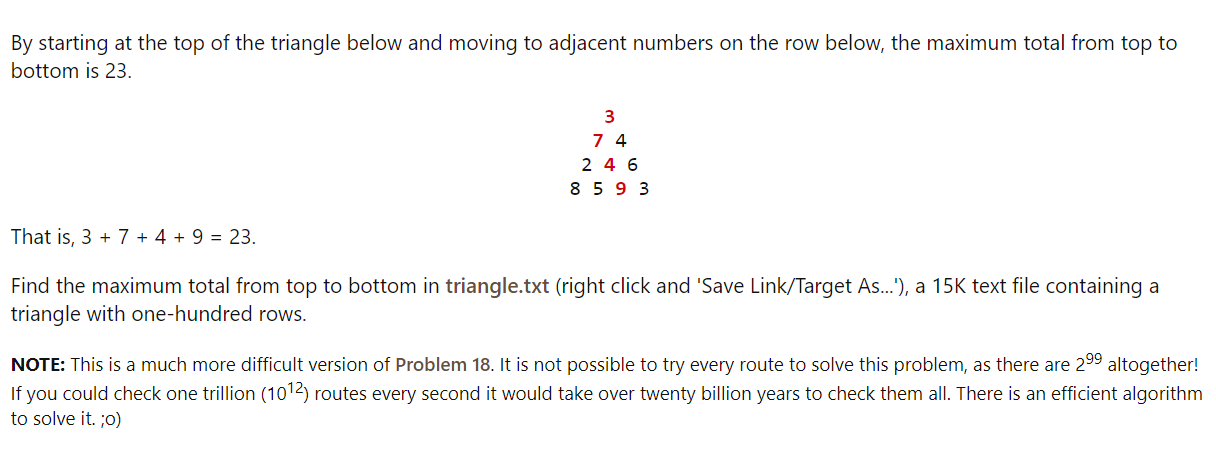

In [1]:
import numpy as np

In [2]:
triangle = ""
with open("triangle.txt", "r+") as file:
    triangle = file.read()
triangle = triangle.strip().split("\n")
triangle = [row.split(" ") for row in triangle]
triangle = [list(map(int,i)) for i in triangle]

In [3]:
%%time
max_path_values = np.zeros((len(triangle), len(triangle[-1])))
def calc_max_path():
    for i, row in reversed(list(enumerate(triangle))):
       for j, _ in enumerate(row):
           max_path_values[i][j] = _calc_max_path(i, j, 0)
    return int(max_path_values[0][0])
    
def _calc_max_path(i, j, current_sum):
    if max_path_values[i][j] != 0:
        return current_sum + max_path_values[i][j]
    elif i+1 > len(triangle)-1:
        return current_sum + triangle[i][j]
    else:
        left_path = 0
        right_path = 0
        if j+1 < len(triangle[i+1]):
            right_path = _calc_max_path(i+1, j+1, current_sum + triangle[i][j])
        if j >= 0:
            left_path = _calc_max_path(i+1, j, current_sum + triangle[i][j])
        return max(left_path, right_path)
print(calc_max_path())

7273
CPU times: user 2.43 ms, sys: 3.72 ms, total: 6.15 ms
Wall time: 6.71 ms
